# **I. Introduction**


Name : Monica M. Pratiwi
<br>
Batch : FTDS-016-RMT

## **About the Dataset**

The data used is  'Animal Image Dataset (90 Different Animals)' from Kaggle. The data size has 698.98 MB, contains 5400 picture of animals from 90 different classes.

## **Objective**

In this assignment, image classification of animals will be performed.

# **II. Import Libraries**

In [ ]:
# Libraries

import numpy as np 
import pandas as pd 
from pathlib import Path
import os.path
import os

import glob
from google.colab import files

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


# **III. Data Loading**

The dataset has largesize and it will be inefficient if the dataset is downloaded first to local drive and upload it to google colab. Since the data located on Kaggle there are several things that can be done to obtain the data.
1. Get API token from Kaggle
2. Upload it on drive
3. Mount drive to colab
4. Configure the directory of the data

In [ ]:
# Mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Configure the data directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_folder"

In [ ]:
# Change data directory
%cd /content/drive/MyDrive/kaggle_folder

/content/drive/MyDrive/kaggle_folder


In [ ]:
# Starts download the dataset (faster and more efficient)
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

 98% 642M/656M [00:04<00:00, 149MB/s]
100% 656M/656M [00:05<00:00, 137MB/s]


In [ ]:
# Check what files are inside `kaggle_folder` on drive (new directory)
%ls

animal-image-dataset-90-different-animals.zip  kaggle.json


In [ ]:
# Unzip dataset
!unzip -q /content/drive/MyDrive/kaggle_folder/animal-image-dataset-90-different-animals.zip -d images

In [ ]:
# Folders listed in the downloaded and unzipped folders
# Notice that there are several folders before reached the actual folder with animals name
os.listdir('/content/drive/MyDrive/kaggle_folder/images/animals/animals')

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


# **IV. Exploratory Data Analysis (EDA)**

In [ ]:
# Set the images directory
image_dir = Path('/content/drive/MyDrive/kaggle_folder/images/animals/animals')

# Get filepaths and labels 
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# Convert to dataframe
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
# Check the last 5 rows of dataframe
image_df.tail()

,Filepath,Label
5395,/content/drive/MyDrive/kaggle_folder/images/an...,zebra
5396,/content/drive/MyDrive/kaggle_folder/images/an...,zebra
5397,/content/drive/MyDrive/kaggle_folder/images/an...,zebra
5398,/content/drive/MyDrive/kaggle_folder/images/an...,zebra
5399,/content/drive/MyDrive/kaggle_folder/images/an...,zebra


From the last 5 rows of the dataframe, based on the label it is seen that the data actually in order. It is better for the model to learn from the random data so it needs to be shuffled.

In [ ]:
# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1, random_state=35).reset_index(drop = True)

# Show the result
image_df.head()

,Filepath,Label
0,/content/drive/MyDrive/kaggle_folder/images/an...,reindeer
1,/content/drive/MyDrive/kaggle_folder/images/an...,possum
2,/content/drive/MyDrive/kaggle_folder/images/an...,fly
3,/content/drive/MyDrive/kaggle_folder/images/an...,jellyfish
4,/content/drive/MyDrive/kaggle_folder/images/an...,reindeer


In [ ]:
# Check the data shape
image_df.shape

(5400, 2)

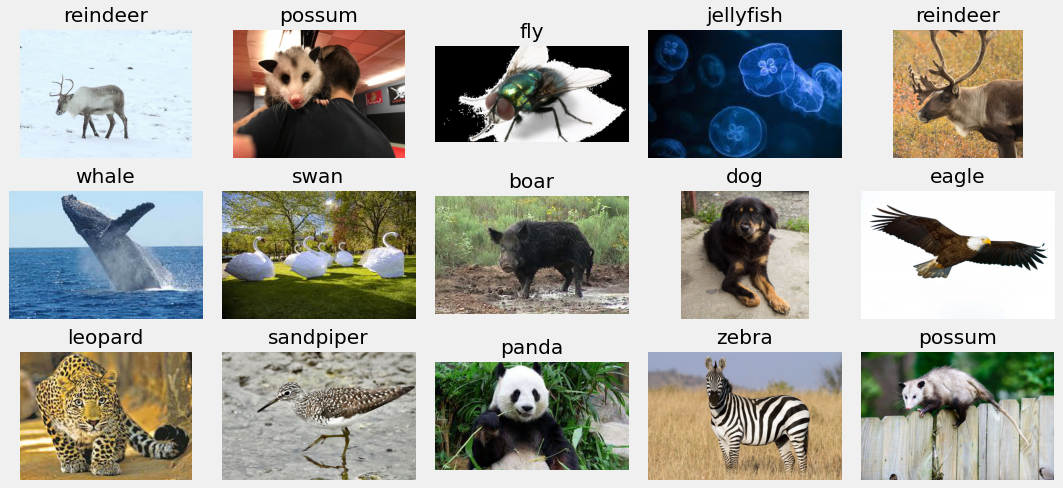

In [ ]:
# Display 20 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

# **V. Data Preprocessing**

In [ ]:
# Separate train, validation and test data
train_val_df, test_df = train_test_split(image_df, test_size=0.1, shuffle=True, random_state=1, stratify = image_df['Label'])
train_df, val_df = train_test_split(train_val_df, test_size=0.1, shuffle=True, random_state=1, stratify = train_val_df['Label'])
print('Train Size : ', train_df.shape)
print('Val Size : ', val_df.shape)
print('Test Size : ', test_df.shape)

Train Size :  (4374, 2)
Val Size :  (486, 2)
Test Size :  (540, 2)


In [ ]:
# Equalize Size
img_height=220
img_width=220
SEED=1
BATCH=64

In [ ]:
# Create `ImageDataGenerator` from dataframe for image augmentation
train_generator = ImageDataGenerator(
    rescale=1./255, #pixel normalization
    rotation_range=0.1,
    width_shift_range=0.2, #horizontal shift and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created by the shift
    height_shift_range=0.2, #vertical shift
    shear_range=0.2, #distort image/stretch the image 
    horizontal_flip=True)

val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# From `ImageDataGenerator` continues to `flow_from_dataframe`
train_ds = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(img_height, img_width), #uniforming the size of target
    color_mode='rgb', #different colors of animals captured in rgb
    class_mode='categorical', #multiclass, Supports multi-label output
    batch_size=BATCH, #number of samples that will be executed through on each batch
    shuffle=True, #randomly shuffled to avoid any overfitting in training
    seed=SEED) #reproduce the same result every run

val_ds = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False, #no need to shuffle for validation set
    seed=SEED)

test_ds = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False, #no need to shuffle for test set
    seed=SEED)

Found 4374 validated image filenames belonging to 90 classes.
Found 486 validated image filenames belonging to 90 classes.
Found 540 validated image filenames belonging to 90 classes.


In [ ]:
# Set checkpoint and callbacks
checkpoint_path = 'models/EfficientNetB1/model_224.h5' #use a trained model without having to retrain it, or pick-up training where you left off in case the training process was interrupted. 

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

EarlyStopping attribute | meaning
---|---
monitor: ’val_loss’, | monitoring loss of validation set
mode:’min’, | training will stop when the quantity monitored has stopped decreasing
patience:10, | after 10 epochs with no improvement, trainings will be stopped. 
verbose:1, | displays messages when the callback takes an action
|

ReduceLROnPlateau attribute | meaning
---|---
monitor:’val_loss’, | monitoring loss of validation set
mode:’min’, | learning rate will be reduced when the quantity monitored has stopped decreasing
factor: 0.1, | learning rate will be reduced 0.1  when accuracy has stopped improving
patience: | after 5 epochs with no improvement, learning rate will be reduced
verbose:1 , | update messages
min_lr: 0.000001, | lower bound on the learning rate
|

ModelCheckpoint attribute | meaning
---|---
monitor:’val_loss’, | monitor the model's total loss
save_best_only=True, | it only saves when the model is considered the "best"
mode:’min’, | if save_best_only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. for val_loss this should be min
verbose: 1, | displays messages when the callback takes an action
save_weights_only=False, | not only the model's weights will be saved
|

# **VI. Modeling**

In [ ]:
inputs= [img_height,img_width,3] #img_height, img_width has been set earlier. 3 means this model use channel rgb

# Build architecture of model sequential
# Define model
model_seq= Sequential()
# Convolution Layer I
model_seq.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=inputs)) 
model_seq.add(MaxPooling2D(pool_size=2, strides=2))
# Convolution Layer II
model_seq.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')) 
model_seq.add(MaxPooling2D(pool_size=2, strides=2))
# Convolution Layer III
model_seq.add(Conv2D(filters=32, kernel_size=3, activation='relu')) 
model_seq.add(MaxPooling2D(pool_size=2, strides=2))

model_seq.add(Flatten())
model_seq.add(Dense(units=128, activation='relu')) 
model_seq.add(Dense(units=90, activation='sigmoid')) # Output Layer

# Compile
model_seq.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_seq.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

Model Building
starts by entering images data with 218 x 218 pixels into the first convolutional layer, which has 16 filters to extract features from the image. Rectified Linear Unit (relu) activation function is choosed to decrease non-linearity. Then the model downsamples or only take the maximum value for each 2×2 pooling area and 2 strides so the data now only has 109 x 109 pixels with 16 filters.
<br>
<br>
The images then processed into the second convolutional layer, the number of filter increased to 32 x 32. The padding = same argument is added to keep the dimension of the feature to be 109 x 109 pixels after being extracted. relu activation function is choosen to decrease non-linearity. The model then again only take the maximum value for each 2×2 pooling area and 2 strides so the images now only has 54 x 54 pixels with 32 filters. 
<br>
<br>
Without padding, the images entered the third convolutional layers now decreases its pixels to 52 x 52 with 32 filters. With 2×2 pooling area and 2 strides and relu as activation function, the images has 26 x 26 pixels with 32 layer.
<br>
<br>
After that, the 26 x 26 pixels images flattened from the 2D array into a 1D array with 26 x 26 x 32 = 21632 nodes. Further extract information can be done using the simple dense layer and relu activation, finished by flowing the information into the output layer, which will be transformed using the activation function to get the probability of each class as the output. For multiclass problem with multi-label classification, the last layer (output layer) nodes is the number of the classes (90), sigmoid as the the activation function.
<br>
<br>
Compile the model by specifying the loss function and the optimizer. For starter, use 50 epochs to train the data. For multiclass problem with multi-label classification, we will use binary cross-entropy as the loss function [based on this](https://medium.com/analytics-vidhya/activation-functions-and-loss-functions-for-neural-networks-how-to-pick-the-right-one-542e1dd523e0). For this case, use adam optimizer. Evaluate the model with the validation data from the generator. The following chart will capture the plot of the model better

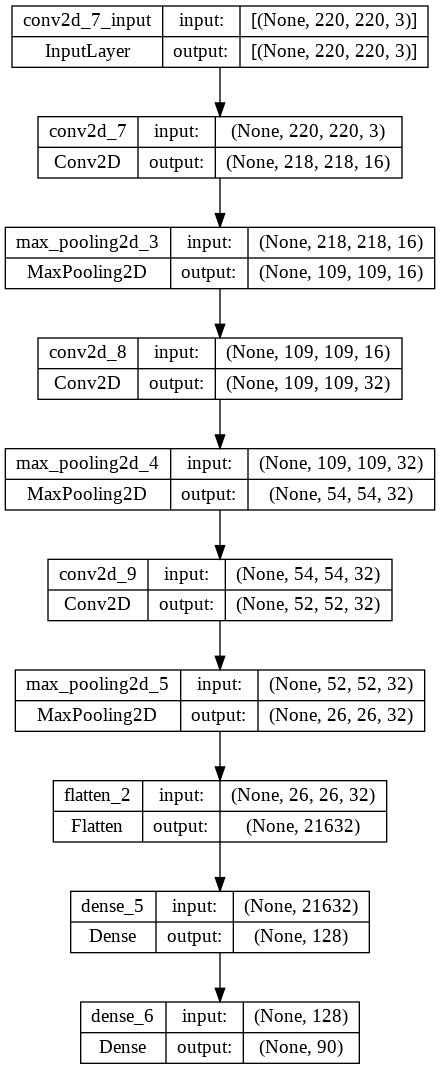

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq, show_shapes=True)

After the model is built, the next process is train the model. Start fitting the data into the model. Batch size is the number of samples that will be executed through on each batch. 50 Epoch means when ENTIRE dataset is passed forward and backward through the neural network only 50 times. Callbacks is used to define what happens before, during, or at the end of a training epoch. 

In [ ]:
# Train the model
history= model_seq.fit(train_ds, batch_size=BATCH, epochs=50, validation_data=val_ds, callbacks=callbacks)

Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.0137
Epoch 1: val_loss improved from inf to 0.06117, saving model to models/EfficientNetB1/model_224.h5
69/69 [==============================] - 126s 2s/step - loss: 0.1015 - accuracy: 0.0137 - val_loss: 0.0612 - val_accuracy: 0.0309 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.0231
Epoch 2: val_loss improved from 0.06117 to 0.05986, saving model to models/EfficientNetB1/model_224.h5
69/69 [==============================] - 118s 2s/step - loss: 0.0607 - accuracy: 0.0231 - val_loss: 0.0599 - val_accuracy: 0.0329 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.0391
Epoch 3: val_loss improved from 0.05986 to 0.05875, saving model to models/EfficientNetB1/model_224.h5
69/69 [==============================] - 119s 2s/step - loss: 0.0595 - accuracy: 0.0391 - val_loss: 0.0587 - val_accuracy: 0.05

From the training above can be seen that the val_accuracy increases while vall_loss decreases, it can be said that model is learning and working fine. However, the model performance is still poor with the val_accuracy score is only 0.33. Learning rate is also reduced several times.

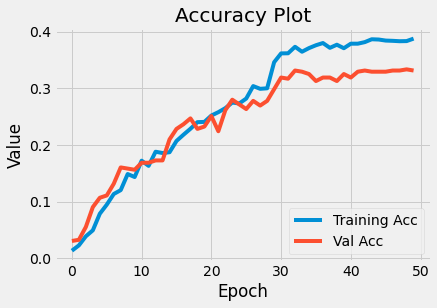

In [ ]:
# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

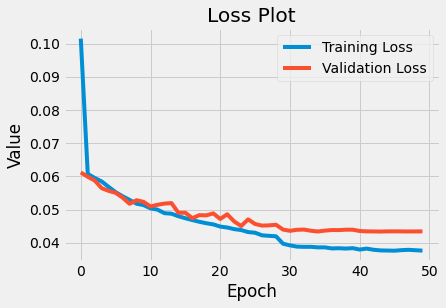

In [ ]:
# Plot the loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model_seq.predict(test_ds)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

9/9 [==============================] - 8s 869ms/step
The first 5 predictions: ['hare', 'shark', 'porcupine', 'panda', 'pig']


In [ ]:
# Print the classification report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

      antelope       0.33      0.17      0.22         6
        badger       1.00      0.33      0.50         6
           bat       0.50      0.50      0.50         6
          bear       0.25      0.17      0.20         6
           bee       0.60      0.50      0.55         6
        beetle       0.00      0.00      0.00         6
         bison       0.33      0.50      0.40         6
          boar       0.11      0.17      0.13         6
     butterfly       0.29      0.33      0.31         6
           cat       0.00      0.00      0.00         6
   caterpillar       0.43      0.50      0.46         6
    chimpanzee       0.27      0.50      0.35         6
     cockroach       0.31      0.83      0.45         6
           cow       0.50      0.67      0.57         6
        coyote       0.00      0.00      0.00         6
          crab       0.11      0.17      0.13         6
          crow       0.25      0.33      0.29  

Based on the classification report, there are only a few model that have recall score more than 70%. Overall, accuracy score is still below the acceptance level with 30% and needs an improvement. In order to increase model performance (especially in accuracy, saving training time), transfer learning can be used.

# **VII. Transfer learning**

In [ ]:
# callback2
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience= 4),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

# Transfer learning
pretrained_model = tf.keras.applications.Xception(include_top=False, input_shape=inputs, pooling='avg')
# Freeze model
pretrained_model.trainable = False

EarlyStopping attribute | meaning
---|---
monitor: ’val_loss’, | monitoring loss of validation set
patience:5, | after 5 epochs with no improvement, trainings will be stopped. 
|

ModelCheckpoint attribute | meaning
---|---
monitor:’val_loss’, | monitor the model's total loss
save_best_only=True, | it only saves when the model is considered the "best"
|

Transfer learning method uses Xception architecture, which stands
for “Extreme Inception”. It is a convolutional neural network architecture
based entirely on depthwise separable convolution layers [(Chollet, 2016).](https://arxiv.org/abs/1610.02357)

Xception attribute | meaning
---|---
include_top: False, | not to include the fully-connected layer at the top of the network.
input_shape: optional shape tuple | fill this if `include_top: False`
pooling: avg, | avg/average means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
|

How a typical transfer learning workflow can be implemented in Keras: [link](https://keras.io/guides/transfer_learning/)
1. Instantiate a base model and load pre-trained weights into it.
2. Freeze all layers in the base model by setting trainable = False.
3. Create a new model on top of the output of one (or several) layers from the base model.
4. Train your new model on your new dataset.

In [ ]:
# Create the model
model_improved = Sequential()
model_improved.add(pretrained_model)
model_improved.add(Flatten())
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dense(90, activation='sigmoid')) # output

model_improved.compile(optimizer='adamax', loss='binary_crossentropy', metrics= ['accuracy'])
model_improved.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               262272    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 90)                11610     
                                                                 
Total params: 21,151,874
Trainable params: 290,394
Non-trainable params: 20,861,480
_________________________________________________________________


There are so many non-trainable parameters, it will not be updating and optimized during training.

In [ ]:
# Train the improved model
history2 = model_improved.fit(train_ds, batch_size= BATCH, epochs= 20, validation_data= val_ds, callbacks= callbacks2)        

Epoch 1/20
69/69 [==============================] - 141s 2s/step - loss: 0.1545 - accuracy: 0.0185 - val_loss: 0.0649 - val_accuracy: 0.0679
Epoch 2/20
69/69 [==============================] - 126s 2s/step - loss: 0.0616 - accuracy: 0.1843 - val_loss: 0.0587 - val_accuracy: 0.3436
Epoch 3/20
69/69 [==============================] - 129s 2s/step - loss: 0.0561 - accuracy: 0.4170 - val_loss: 0.0532 - val_accuracy: 0.5370
Epoch 4/20
69/69 [==============================] - 135s 2s/step - loss: 0.0505 - accuracy: 0.5825 - val_loss: 0.0471 - val_accuracy: 0.6399
Epoch 5/20
69/69 [==============================] - 138s 2s/step - loss: 0.0441 - accuracy: 0.6694 - val_loss: 0.0406 - val_accuracy: 0.6811
Epoch 6/20
69/69 [==============================] - 129s 2s/step - loss: 0.0378 - accuracy: 0.7193 - val_loss: 0.0347 - val_accuracy: 0.6975
Epoch 7/20
69/69 [==============================] - 125s 2s/step - loss: 0.0322 - accuracy: 0.7599 - val_loss: 0.0299 - val_accuracy: 0.7387
Epoch 8/20
69

Based on the training, the val_accuracy improved to 87% with 20 epoch. Although it is higher that the previous model before improvement, the score still less than the accuracy of training data, meaning the data still overfit. Beside that, there is no actual improvement in the second model and only relies on the transfer learning from the previous model, which is actually the result of the lack of thoroughness. The graph below captures the process of model training.

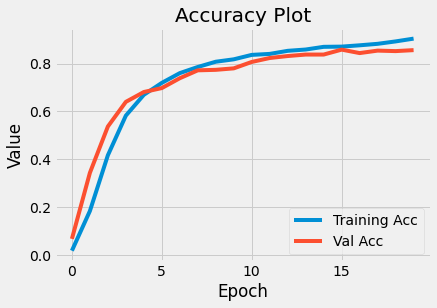

In [ ]:
# Plot the accuracy of training and validation
plt.plot(history2.history['accuracy'], label='Training Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value') 
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

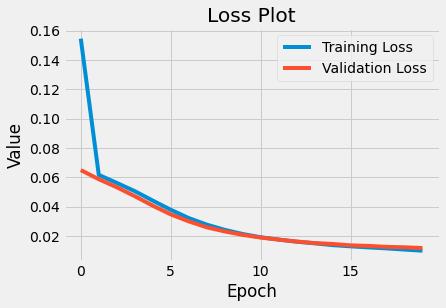

In [ ]:
# Plot the loss on train & validation
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Predict the label of the test_images
pred2 = model_improved.predict(test_ds)
pred2 = np.argmax(pred2,axis=1)

# Map the label
labels = (train_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred2]

# Display the result
print(f'The first 5 predictions: {pred2[:5]}')

9/9 [==============================] - 17s 2s/step
The first 5 predictions: ['hare', 'shark', 'porcupine', 'panda', 'pig']


In [ ]:
# Print Classification Report
y_test2 = list(test_df.Label)
print(classification_report(y_test2, pred2))

                precision    recall  f1-score   support

      antelope       1.00      0.83      0.91         6
        badger       1.00      0.83      0.91         6
           bat       0.60      1.00      0.75         6
          bear       1.00      0.83      0.91         6
           bee       1.00      1.00      1.00         6
        beetle       1.00      1.00      1.00         6
         bison       1.00      1.00      1.00         6
          boar       0.86      1.00      0.92         6
     butterfly       0.83      0.83      0.83         6
           cat       0.83      0.83      0.83         6
   caterpillar       1.00      0.83      0.91         6
    chimpanzee       1.00      1.00      1.00         6
     cockroach       1.00      1.00      1.00         6
           cow       0.83      0.83      0.83         6
        coyote       1.00      0.83      0.91         6
          crab       1.00      1.00      1.00         6
          crow       1.00      1.00      1.00  

Based on the recall score, the model can predict most of the animals with high accuracy.

# **VIII. Testing using Images**

In [ ]:
# predict using other images
uploaded = files.upload()

Saving 1b7238b986.jpg to 1b7238b986.jpg
Saving 2c5664872f.jpg to 2c5664872f.jpg
Saving 1de5e32b3e.jpg to 1de5e32b3e.jpg


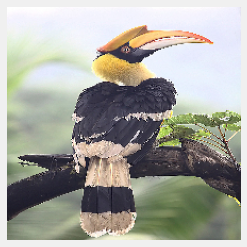

1/1 [==============================] - 1s 859ms/step
Result     :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0132268e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0479041e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.1803691e-33 0.0000000e+00 6.2035204e-34
  0.0000000e+00 0.0000000e+00 4.4131503e-37 2.5515452e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+

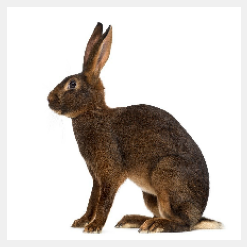

1/1 [==============================] - 0s 25ms/step
Result     :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Max Class  :  0
Class Name :  antelope



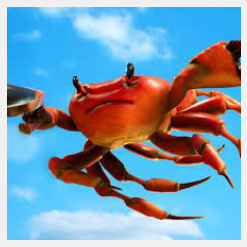

1/1 [==============================] - 0s 31ms/step
Result     :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9815675e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7865043e-30
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.0077392e-34 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.4188591e-38 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.8330117e-31 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.8539564e-37 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+0

In [ ]:


for fn in uploaded.keys():
 
  # upload images
  path = fn
  img =  tf.keras.utils.load_img(path, target_size=(img_height,img_width)) #harus sama dengan model kita
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = tf.keras.utils.img_to_array(img) # change image to array
  x = np.expand_dims(x, axis=0) #extend array shape e.g. from 1D to 2D, 0 means row/horizontal [[1, 2]]

  images = np.vstack([x])
  prediction = model_improved.predict(images)
  result_max_proba = prediction.argmax(axis=-1)[0]
  result_class = labels[result_max_proba]

  print('Result     : ', prediction)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')

#**IX. Conclusion**

The model of image classification for animals is built with accuracy around 87%. However, when it is tested with several pictures, the model failed to recognized every pictures given. Meaning that there might problems in the preprocessing stage where there are some noises (from images contain other things than just animals e.g. grass, human, sky).